In [2]:
import xgboost

import shap

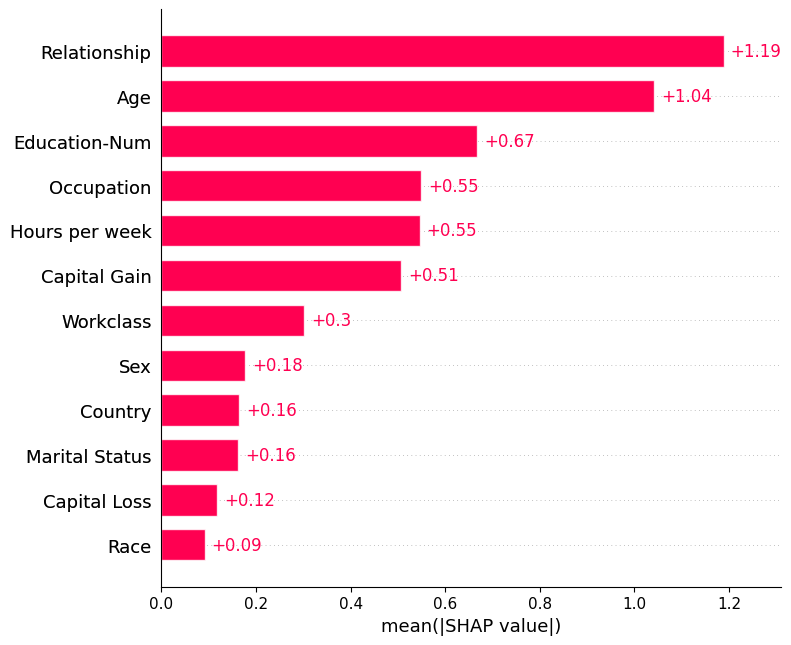

74

In [3]:
# train XGBoost model
X, y = shap.datasets.adult(n_points=2000)
model = xgboost.XGBClassifier().fit(X, y)


# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)
shap.plots.bar(shap_values,max_display=12)

y_binary = [1 if income == True else 0 for income in y]
predict = model.predict(X)
Wrong_pred = []
for i in range(len(predict)):
    if predict[i] != y_binary[i]:
        Wrong_pred.append(i)
len(Wrong_pred)

In [4]:
for i in range(len(shap_values.data)):
    if shap_values.data[i][8] > 15000:
        print("index",i)

index 34
index 86
index 105
index 108
index 125
index 132
index 142
index 180
index 183
index 190
index 212
index 291
index 293
index 347
index 382
index 404
index 423
index 543
index 563
index 639
index 650
index 666
index 703
index 711
index 786
index 826
index 895
index 924
index 1177
index 1267
index 1398
index 1423
index 1426
index 1427
index 1515
index 1570
index 1590
index 1601
index 1603
index 1661
index 1687
index 1883
index 1907
index 1911
index 1915


In [5]:
features = []
values = []
for feature, value in zip(shap_values.feature_names, shap_values.values.mean(axis=0)):
    print(f"Feature: {feature}, Value: {value}")
    features.append(feature)
    values.append(value)

Feature: Age, Value: 0.019877746563360013
Feature: Workclass, Value: 0.037034297399680394
Feature: Education-Num, Value: -0.04566514782969691
Feature: Marital Status, Value: -0.0018550093332273543
Feature: Occupation, Value: 0.02659017663474602
Feature: Relationship, Value: -0.07057838241285233
Feature: Race, Value: 0.009732152108252559
Feature: Sex, Value: 0.011971603518377234
Feature: Capital Gain, Value: 0.1705530854767793
Feature: Capital Loss, Value: 0.03028674932202907
Feature: Hours per week, Value: 0.02322219604708106
Feature: Country, Value: 0.02634668925409456


In [6]:

# Create a DataFrame for easier manipulation
data = X.copy()
data['income'] = predict


# Find the mean or median values of features for high-income instances
high_income_data = data[data['income'] == 1]
print(len(high_income_data))
general_case_high_income = high_income_data.median()  # or use .median() for median values

print("General case for high income:")
print(general_case_high_income)

493
General case for high income:
Age               45.0
Workclass          4.0
Education-Num     13.0
Marital Status     2.0
Occupation         7.0
Relationship       4.0
Race               4.0
Sex                1.0
Capital Gain       0.0
Capital Loss       0.0
Hours per week    42.0
Country           39.0
income             1.0
dtype: float64


SHAP values for the current instance:


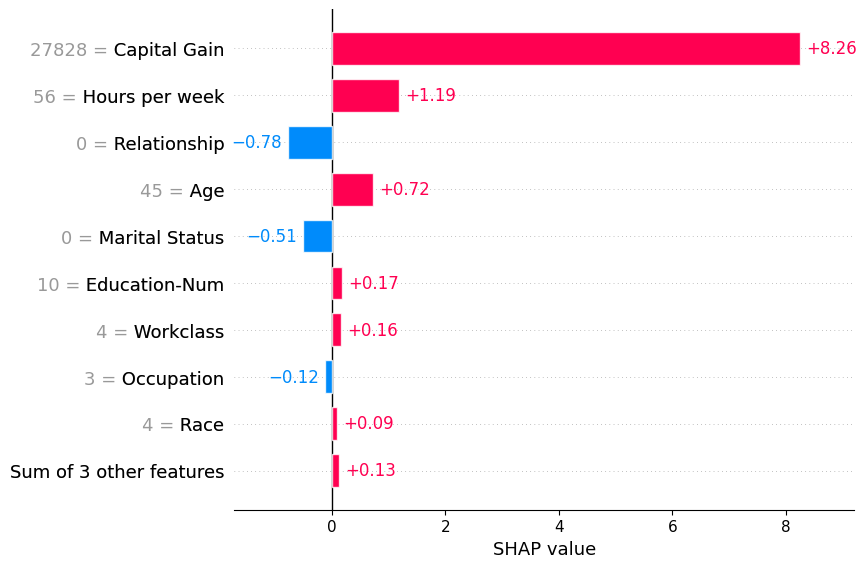

SHAP values for the general case of high income:


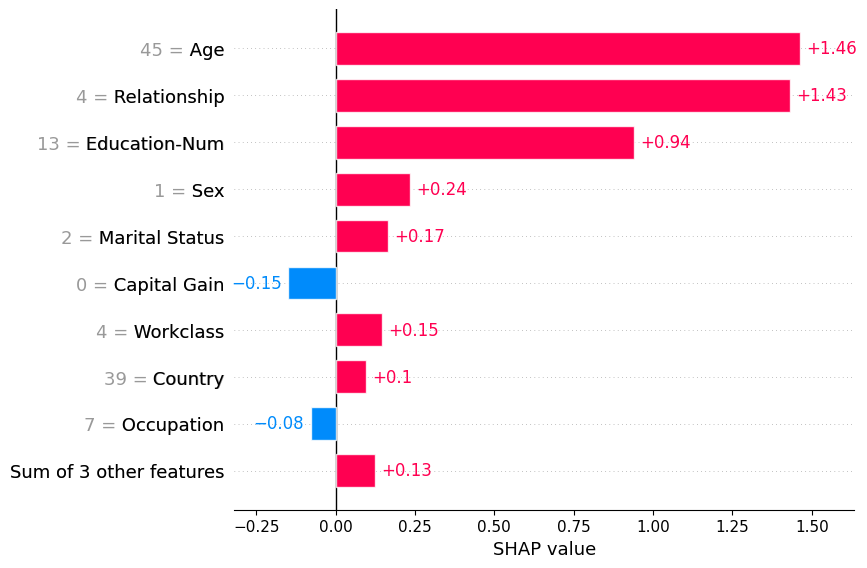

In [76]:
import pandas as pd
current_instance = X.iloc[105]  # Example: first instance
current_shap_values = shap_values[105]

# Compute SHAP values for the general case
general_case_shap_values = explainer(pd.DataFrame([general_case_high_income.drop('income')]))

print("SHAP values for the current instance:")
shap.plots.bar(current_shap_values)
print("SHAP values for the general case of high income:")
shap.plots.bar(general_case_shap_values[0])

In [77]:
current_shap_values

.values =
array([ 7.18542156e-01,  1.64976627e-01,  1.69614373e-01, -5.14806172e-01,
       -1.16327520e-01, -7.75596714e-01,  9.25102614e-02,  7.07636665e-02,
        8.25733263e+00,  3.95467337e-04,  1.18549474e+00,  5.89368905e-02])

.base_values =
-3.034144449280776

.data =
array([4.5000e+01, 4.0000e+00, 1.0000e+01, 0.0000e+00, 3.0000e+00,
       0.0000e+00, 4.0000e+00, 1.0000e+00, 2.7828e+04, 0.0000e+00,
       5.6000e+01, 3.9000e+01])

In [78]:
general_case_shap_values

.values =
array([[ 1.46426643,  0.14750211,  0.94144352,  0.16509619, -0.07852742,
         1.43008057,  0.07263152,  0.23584135, -0.14968741, -0.01567754,
         0.06824165,  0.09596358]])

.base_values =
array([-3.03414445])

.data =
array([[45.,  4., 13.,  2.,  7.,  4.,  4.,  1.,  0.,  0., 42., 39.]])

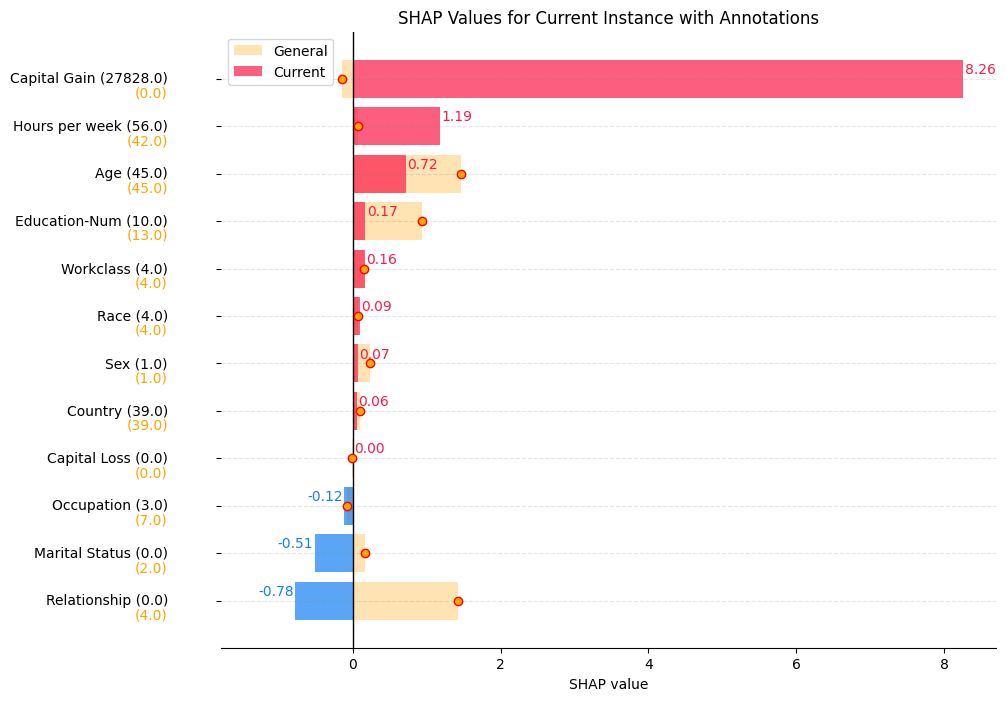

In [90]:
import matplotlib.pyplot as plt
import shap
import pandas as pd
import numpy as np

# Assuming current_shap_values and general_case_shap_values are already defined
# And X is the dataset used for feature columns

# Convert SHAP values to a DataFrame for easier handling
shap_df = pd.DataFrame({
    'feature': X.columns,
    'current_value': current_shap_values.values,
    'general_value': general_case_shap_values.values[0],
    'current_feature_value': current_shap_values.data,
    'general_feature_value': general_case_shap_values.data[0],
})

# Sort by current SHAP values
shap_df = shap_df.sort_values(by='current_value', ascending=False).reset_index(drop=True)

# Define colors for positive and negative SHAP values
colors = ['#FB1A49' if val >= 0 else '#157FF3' for val in shap_df['current_value']]

# Plot SHAP values for the current instance
plt.figure(figsize=(10, 8))

# Plot general SHAP values as a background bar with lower opacity
plt.barh(shap_df['feature'], shap_df['general_value'], color='orange', alpha=0.3, label='General')

# Plot current SHAP values
plt.barh(shap_df['feature'], shap_df['current_value'], color=colors, alpha=0.7, label='Current')

# Add a black vertical line at x=0
plt.axvline(x=0, color='black', linewidth=1)

# Add annotations comparing to the general case
for idx, row in shap_df.iterrows():
    plt.scatter([row['general_value']], [idx], color='orange', edgecolors='red', zorder=5)
    # plt.text(row['general_value'], idx + 0.4, f"{row['general_value']:.2f}", color='orange')

# Add feature values next to the y-axis and on the bars
for idx, row in shap_df.iterrows():
    if row['current_value'] >= 0:
        plt.text(row['current_value'] + 0.02, idx - 0.2, f"{row['current_value']:.2f}", va='center', color='#FB1A49')
    else:
        plt.text(row['current_value'] - 0.02, idx - 0.2, f"{row['current_value']:.2f}", va='center', ha='right', color='#157FF3')

plt.title('SHAP Values for Current Instance with Annotations')
plt.xlabel('SHAP value')

# Create y-axis labels with feature names and corresponding feature values
ax = plt.gca()

# Set y-tick labels with custom formatting
for i, row in shap_df.iterrows():
    ax.text(-2.5, i, f"{row['feature']} ({row['current_feature_value']:.1f})", va='center', ha='right', color='black', fontsize=10)
    ax.text(-2.5, i + 0.3, f"({row['general_feature_value']:.1f})", va='center', ha='right', color='orange', fontsize=10)

# Remove the top, right, and left borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Invert y-axis to have the highest value on top
plt.gca().invert_yaxis()

# Add horizontal grid lines with dashed style
plt.gca().yaxis.grid(True, linestyle='--', which='both', color='gray', alpha=0.2)

# Hide the default y-tick labels
ax.set_yticklabels([])

# Adjust x-axis limits
min_value = shap_df['current_value'].min()
plt.gca().set_xlim(left=min_value - 1)

# Show the legend
plt.legend()

plt.show()


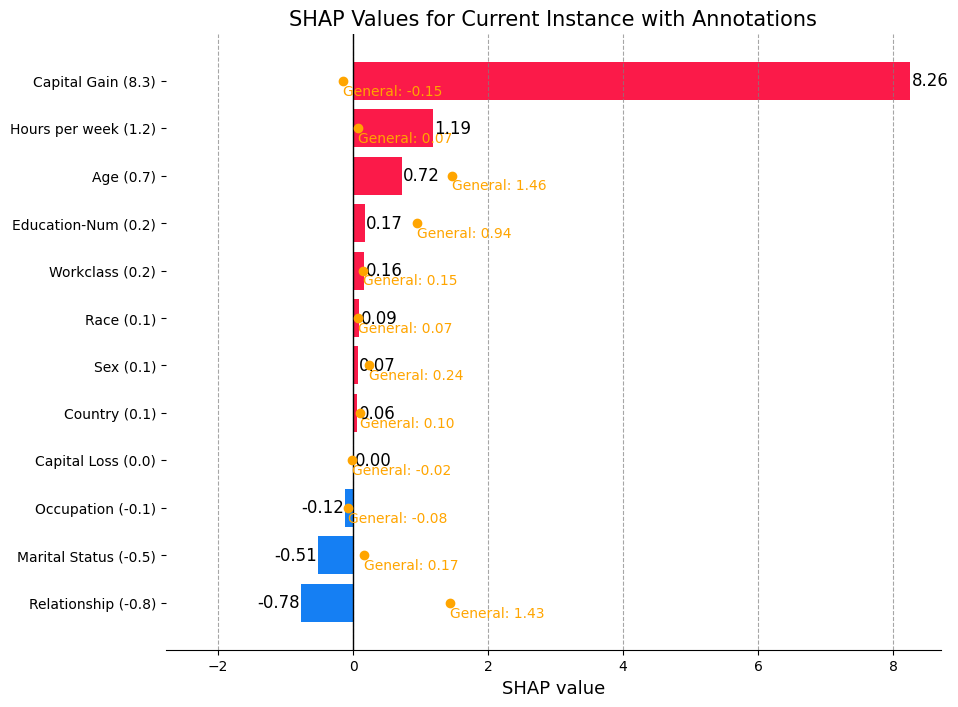

In [42]:
import matplotlib.pyplot as plt
import shap
import pandas as pd
import numpy as np

# Assuming current_shap_values and general_case_shap_values are already defined
# And X is the dataset used for feature columns

# Convert SHAP values to a DataFrame for easier handling
shap_df = pd.DataFrame({
    'feature': X.columns,
    'current_value': current_shap_values.values,
    'general_value': general_case_shap_values.values[0]
})

# Sort by current SHAP values
shap_df = shap_df.sort_values(by='current_value', ascending=False).reset_index(drop=True)

# Define colors for positive and negative SHAP values
colors = ['#FB1A49' if val >= 0 else '#157FF3' for val in shap_df['current_value']]

# Create y-axis labels with feature names and corresponding feature values
y_labels = [f"{row['feature']} ({row['current_value']:.1f})" for _, row in shap_df.iterrows()]

# Plot SHAP values for the current instance
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.barh(shap_df['feature'], shap_df['current_value'], color=colors)

# Add a black vertical line at x=0
ax.axvline(x=0, color='black', linewidth=1)

# Add annotations comparing to the general case
for idx, row in shap_df.iterrows():
    diff = row['current_value'] - row['general_value']
    # Highlight general SHAP value
    ax.scatter([row['general_value']], [idx], color='orange', zorder=5)
    ax.text(row['general_value'], idx + 0.3, f"General: {row['general_value']:.2f}", color='orange')

# Add feature values next to the y-axis and on the bars
for idx, row in shap_df.iterrows():
    if row['current_value'] >= 0:
        # Add feature value to the right of the bar
        ax.text(row['current_value'] + 0.02, idx, f"{row['current_value']:.2f}", va='center', ha='left', color='black', fontsize=12)
    else:
        # Add feature value to the left of the bar
        ax.text(row['current_value'] - 0.02, idx, f"{row['current_value']:.2f}", va='center', ha='right', color='black', fontsize=12)

# Set y-tick labels
# Create y-axis labels with feature names and corresponding feature values
y_labels = [f"{row['feature']} ({row['current_value']:.1f})" for _, row in shap_df.iterrows()]
ax.set_yticks(np.arange(len(y_labels)))
ax.set_yticklabels(y_labels)

# Set title and labels
ax.set_title('SHAP Values for Current Instance with Annotations', fontsize=15)
ax.set_xlabel('SHAP value', fontsize=13)

# Remove the top, right, and left borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add horizontal grid lines with dashed style
ax.xaxis.grid(True, linestyle='--', which='both', color='gray', alpha=0.7)

# Invert y-axis to have the highest value on top
ax.invert_yaxis()

# Adjust the y-axis label position
ax.yaxis.set_label_coords(-0.15, 0.5)

# Adjust x-axis limits
min_value = shap_df['current_value'].min()
ax.set_xlim(left=min_value - 2)

# Show the plot
plt.show()


In [ ]:
"""

Feature: Age, Value: 1.04
Feature: Workclass, Value: 0.29
Feature: Education-Num, Value: 0.59
Feature: Marital Status, Value: -0.14
Feature: Occupation, Value: 0.56
Feature: Relationship, Value: 1.24
Feature: Race, Value: 0.1
Feature: Sex, Value: 0.22
Feature: Capital Gain, Value: 0.49
Feature: Capital Loss, Value: 0.13
Feature: Hours per week, Value: 0.57
Feature: Country, Value: 0.18
"""

In [40]:

for i in range(len(shap_values)):
    values = shap_values[i].values
    data = shap_values[i].data
    # all_positive = all(value < 0 for value in values)
    if data[8] > 13000 and data[2]<3:
        print(f"in [{i}] are {y[i]}.")
    
    

In [36]:
shap_values[415].data[2]

3.0

In [90]:
y[653]

False

In [91]:
shap_values[653]

.values =
array([-1.84830222, -0.02591961, -2.0678254 ,  0.07451548, -1.07414642,
        0.57346407,  0.11611002,  0.15054857,  5.65077203, -0.01893019,
       -0.03924661,  0.07882923])

.base_values =
-3.034144449280776

.data =
array([6.7000e+01, 4.0000e+00, 4.0000e+00, 2.0000e+00, 1.4000e+01,
       4.0000e+00, 2.0000e+00, 1.0000e+00, 1.0566e+04, 0.0000e+00,
       4.0000e+01, 3.9000e+01])

In [108]:
y[26]

False

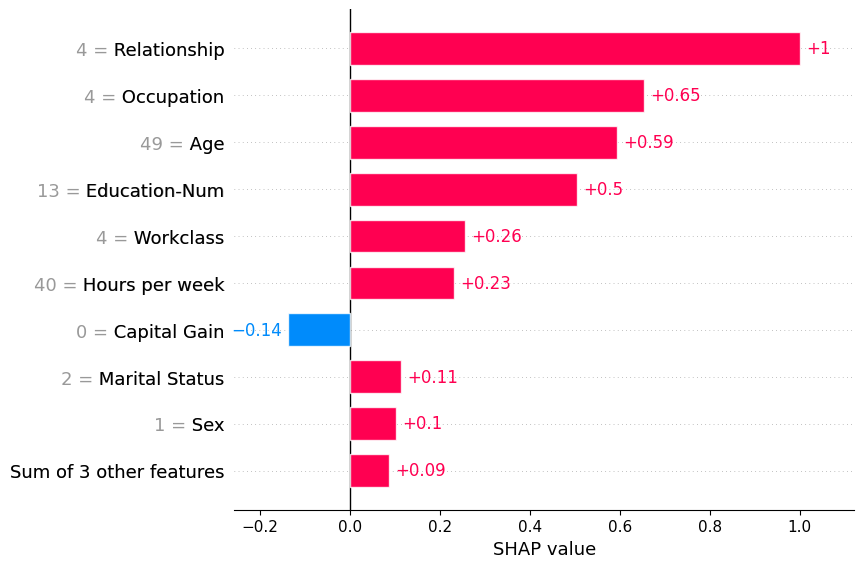

predct: 1 Label: 0


In [126]:
index = 54
shap.plots.bar(shap_values[index])
print("predct:",predict[index], "Label:",y_binary[index])

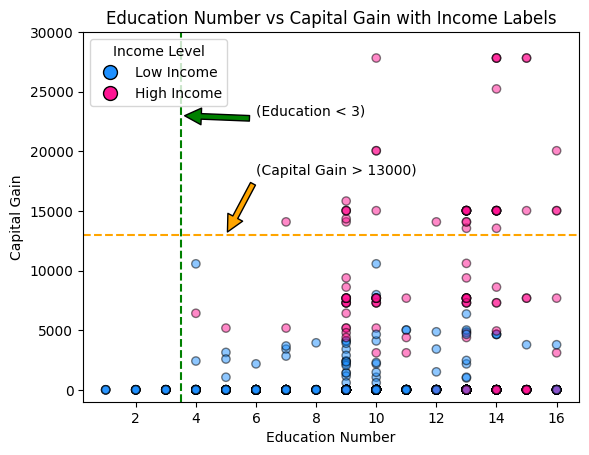

In [92]:
import shap
import matplotlib.pyplot as plt

# Load the dataset
X, y = shap.datasets.adult(n_points=2000)

# Convert y to binary high-income and low-income
# Assuming high income is represented by '>50K' and low income by '<=50K'
y_binary = predict

# Plotting
fig, ax = plt.subplots()

# Scatter plot of education-num vs. capital-gain with colors representing high-income and low-income
colors = ['deeppink' if income == 1 else 'dodgerblue' for income in y_binary]

# Extract relevant features
education_num = X['Education-Num']
capital_gain = X['Capital Gain']

# Scatter plot
scatter = ax.scatter(education_num, capital_gain, c=colors, alpha=0.5, edgecolor='k')

# Adding labels and title
ax.set_xlabel('Education Number')
ax.set_ylabel('Capital Gain')
ax.set_title('Education Number vs Capital Gain with Income Labels')

# Create a legend
legend_labels = {0: 'Low Income', 1: 'High Income'}
handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[i], 
                      markersize=10, markerfacecolor=c, markeredgecolor='k') for i, c in zip(legend_labels.keys(), ['dodgerblue', 'deeppink'])]
ax.legend(handles=handles, title="Income Level")

# Decision boundaries
ax.axhline(y=13000, color='orange',linestyle='--', label='Capital Gain = 13000')
ax.axvline(x=3.5, color='green', linestyle='--', label='Education number = 3')

# # Adding annotations
ax.annotate('(Education < 3)', xy=(3.5, 23000), xytext=(6, 23000),
            arrowprops=dict(facecolor='green', shrink=0.05))
ax.annotate('(Capital Gain > 13000)', xy=(5, 13000), xytext=(6, 18000),
            arrowprops=dict(facecolor='orange', shrink=0.05))
plt.ylim((-1000, 30000))
plt.show()


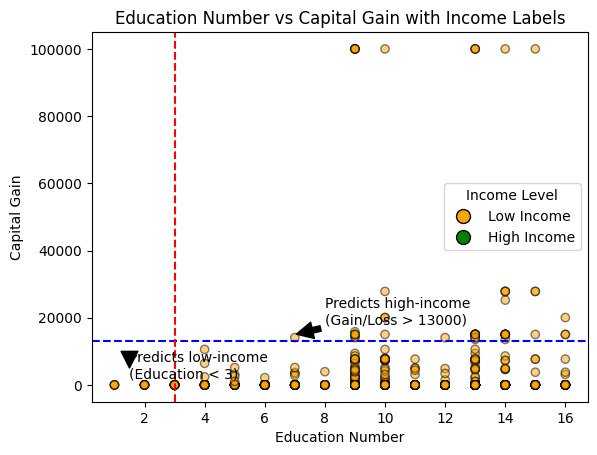

In [47]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
X, y = shap.datasets.adult(n_points=2000)

# Convert y to binary high-income and low-income
# Assuming high income is represented by '>50K' and low income by '<=50K'
y_binary = [1 if income == '>50K' else 0 for income in y]

# Plotting
fig, ax = plt.subplots()

# Scatter plot of education-num vs. capital-gain with colors representing high-income and low-income
colors = ['green' if income == 1 else 'orange' for income in y_binary]

# Extract relevant features
education_num = X['Education-Num']
capital_gain = X['Capital Gain']

# Scatter plot
scatter = ax.scatter(education_num, capital_gain, c=colors, alpha=0.5, edgecolor='k')

# Adding labels and title
ax.set_xlabel('Education Number')
ax.set_ylabel('Capital Gain')
ax.set_title('Education Number vs Capital Gain with Income Labels')

# Create a legend
legend_labels = {0: 'Low Income', 1: 'High Income'}
handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[i], 
                      markersize=10, markerfacecolor=c, markeredgecolor='k') for i, c in zip(legend_labels.keys(), ['orange', 'green'])]
ax.legend(handles=handles, title="Income Level")

# Decision boundaries
ax.axhline(y=13000, color='blue', linestyle='--', label='Gain/Loss = 13000')
ax.axvline(x=3, color='red', linestyle='--', label='Education number = 3')

# Adding annotations
ax.annotate('Predicts low-income\n(Education < 3)', xy=(1.5, 5000), xytext=(1.5, 2000),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Predicts high-income\n(Gain/Loss > 13000)', xy=(7, 15000), xytext=(8, 18000),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()


In [15]:
shap_values[0].data

array([27.,  4., 10.,  0.,  1.,  1.,  4.,  0.,  0.,  0., 44., 39.])

In [12]:
for feature, value in zip(shap_values[0].feature_names, shap_values[0].values):
    print(f"Feature: {feature}, Value: {value}")
    features.append(feature)
    values.append(value)

Feature: Age, Value: -1.0396302726236173
Feature: Workclass, Value: 0.2834830520895775
Feature: Education-Num, Value: -0.1816734095069114
Feature: Marital Status, Value: 0.29311687163542954
Feature: Occupation, Value: 0.38351425481319895
Feature: Relationship, Value: -1.4683598917897325
Feature: Race, Value: 0.07990518419072032
Feature: Sex, Value: -0.015893503637053073
Feature: Capital Gain, Value: -0.16404540448682384
Feature: Capital Loss, Value: -0.008758421652019024
Feature: Hours per week, Value: -0.3751717181224376
Feature: Country, Value: 0.07733929582638666
